Steps:
    
1) Import libraries and read the dataset.

2) Explore Data Analysis. Find out how one variable related to other and distributions of data.

3) State your insights.

4) Build a linear regression model to predict the house prices

5) Try to find out important features or create new features to improve the performance for your model.

6) Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.


# 1) Import libraries and read the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
house_df = pd.read_csv('kc_house_data.csv')

In [3]:
house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
house_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20140825T000000,20150126T000000,20141014T000000,20150326T000000,20150219T000000,20140521T000000,20150223T000000,20140623T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,507250,429000,610685,1.0075e+06,475000,360000,400000,402101,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,2.5,2,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,2,2,2,3,2,2,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#change the date parameter to just sold year
house_df['date'] = house_df['date'].astype('str')
house_df['date']=house_df.date.str[:4]
house_df['date']=house_df['date'].astype(int)

In [7]:
#We donot need certain features like zipcode, ID, so dropping these columns from the dataframe
columns_to_be_dropped = house_df.columns[[0,16]]
house_df.drop(columns_to_be_dropped,axis=1, inplace=True)


In [8]:
#Looking for any null values
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
date             21613 non-null int32
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int32(1), int64(13)
memory usage: 3.1 MB


Everything is non null

In [9]:
#Let's do summary stats of the dataframe
house_df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014.322954,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.467616,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2) Explore Data Analysis. Find out how one variable related to other and distributions of data.


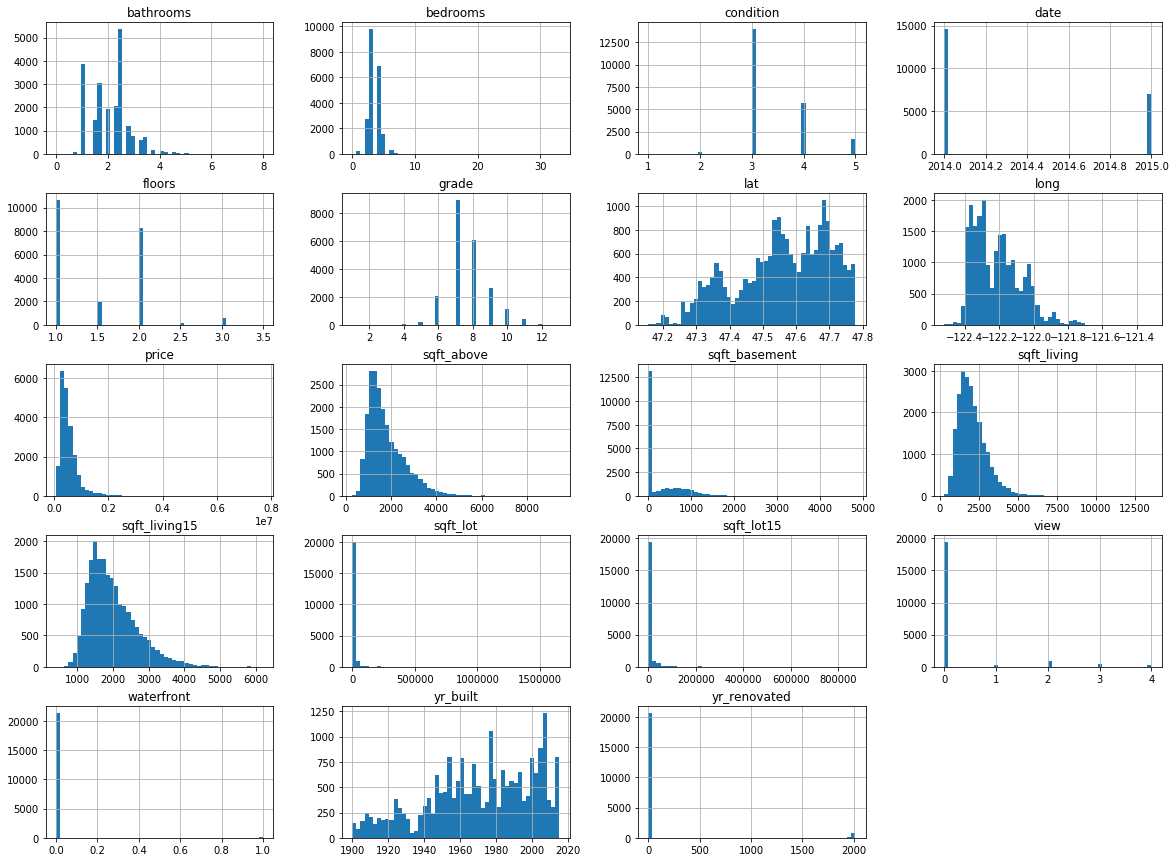

In [10]:
#Histogram plots for understanding the ditribution of each column in the dataframe
%matplotlib inline
import matplotlib.pyplot as plt
house_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [11]:
#correlation of the dependent variable with other independent variables
corr_matrix = house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003576
Name: price, dtype: float64

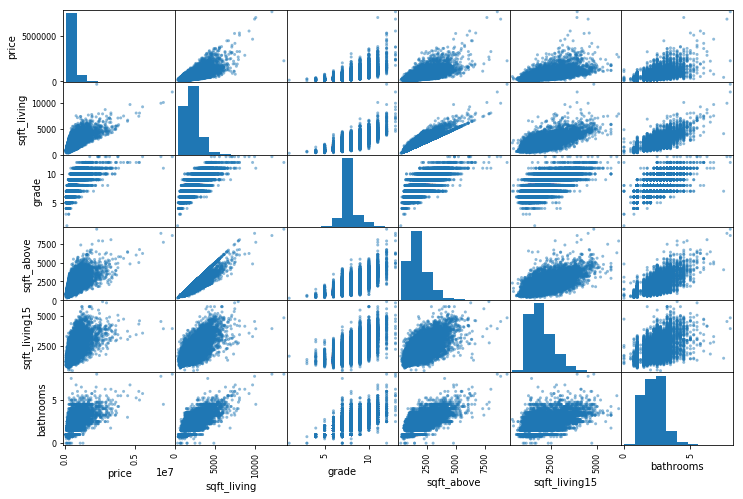

In [12]:
from pandas.tools.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade", "sqft_above","sqft_living15","bathrooms"]
scatter_matrix(house_df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

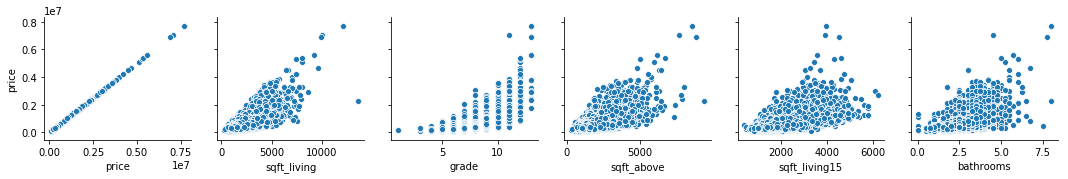

In [13]:
#We will just focus on a few promising variables, that seem the most correlated with the price.
pp = sns.pairplot(data=house_df,
                  y_vars=['price'],
                  x_vars=attributes)
pp

# 3) Insights

**sqft_living is the parameter that has good correlation as well as the pairplot also shows upward trend with less dispersion**

View , Waterfront,Yr_Renovated has lot of zero values.

There is 5 strongly correlated values with Price:
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138

Most Parameters like sqft_lot, year_renovated, have most of the values as 0, so they donot cover much of the variance in the dataset


In [14]:
# 5)Build a linear regression model to predict the house prices


In [15]:
#Buiding linear model with default feature set
X = house_df.drop('price',axis=1)
y = house_df.price

In [16]:
def ApplyLinAlg(X,y):
    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,test_size=validation_size,random_state=seed)
    lms = LinearRegression()
    
    lms.fit(X_train,Y_train)
    mpredictions = lms.predict(X_validation)
    print('Coefficients: \n ', lms.coef_)
    print('MAE:', metrics.mean_absolute_error(Y_validation, mpredictions))
    print('MSE:', metrics.mean_squared_error(Y_validation, mpredictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_validation, mpredictions)))
    r_squared = metrics.r2_score(Y_validation,mpredictions)
    print('RSquare:',"-", r_squared)
    print('Reg Score',lms.score(X_validation,Y_validation) )
    fig, ax = plt.subplots()
    ax.scatter(Y_validation, mpredictions, edgecolors=(0, 0, 0))
    ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

Coefficients: 
  [ 3.11092306e+04 -3.29089824e+04  3.93842060e+04  1.10189860e+02
  8.06205909e-02  8.60436855e+03  6.04530457e+05  4.83723081e+04
  3.29958127e+04  9.57757511e+04  6.77601060e+01  4.24297543e+01
 -2.46560908e+03  2.66288827e+01  5.64481343e+05 -1.16465598e+05
  3.11261382e+01 -3.67037593e-01]
MAE: 128041.1468145162
MSE: 42238906822.27222
RMSE: 205521.06174860089
RSquare: - 0.6804090312105644
Reg Score 0.6804090312105644


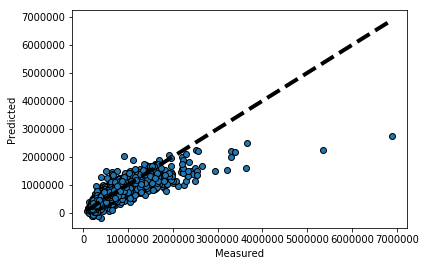

(None, (21613, 18))

In [17]:

ApplyLinAlg(X,y) , X.shape

Scores are low with all the features. Lets try to use just the correlated features to see if the scores are improving

# 4) Try to find out important features or create new features to improve the performance for your model.

In [19]:
#cost per sqft is an important parameter that incorporates the size vs cost. So lets add cost_per_sqft
house_df['cost_per_sqft'] = house_df['price']/house_df['sqft_living'] 

In [20]:
house_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,cost_per_sqft
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,188.050847
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,209.338521
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,233.766234
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,308.163265
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,303.571429
5,2014,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,226.014760
6,2014,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819,150.145773
7,2015,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711,275.330189
8,2015,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,128.932584
9,2015,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570,170.899471


In [21]:
corr_matrix = house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
cost_per_sqft    0.554703
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003576
Name: price, dtype: float64

**cost_per_sqft is also having a medium correlation with price.**

**But more importantly, we can use this to separate low priced houses with high priced ones.**


In [22]:
#adding another column called group_price
#find out the mean of the cost_per_sqft
house_df['cost_per_sqft'].describe()


count    21613.000000
mean       264.156594
std        110.060793
min         87.588235
25%        182.291667
50%        244.644550
75%        318.322981
max        810.138889
Name: cost_per_sqft, dtype: float64

In [23]:
#top 50% constitute values below 245 so splitting the group_prices based on price = 245
#0 indicates low rate and 1 indicates high price
def get_group(x):
    if x>245:
        return 1
    else:
        return 0
house_df['group_prices'] = house_df.cost_per_sqft.apply(get_group)

In [24]:
house_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,cost_per_sqft,group_prices
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,188.050847,0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,209.338521,0
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,233.766234,0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,308.163265,1
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,303.571429,1
5,2014,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,47.6561,-122.005,4760,101930,226.014760,0
6,2014,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,1715,0,1995,0,47.3097,-122.327,2238,6819,150.145773,0
7,2015,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,1060,0,1963,0,47.4095,-122.315,1650,9711,275.330189,1
8,2015,229500.0,3,1.00,1780,7470,1.0,0,0,3,...,1050,730,1960,0,47.5123,-122.337,1780,8113,128.932584,0
9,2015,323000.0,3,2.50,1890,6560,2.0,0,0,3,...,1890,0,2003,0,47.3684,-122.031,2390,7570,170.899471,0


In [25]:
#Going by the correlation we can drop last few columns and those are : sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,yr_built,condition,long,date   
drop_columns = ['sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated','sqft_lot','sqft_lot15','yr_built','condition','long','date']             
house_df.drop(drop_columns,axis=1,inplace=True)

In [26]:
house_df.head()

,price,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,cost_per_sqft,group_prices
0,221900.0,1.00,1180,0,7,1180,1340,188.050847,0
1,538000.0,2.25,2570,0,7,2170,1690,209.338521,0
2,180000.0,1.00,770,0,6,770,2720,233.766234,0
3,604000.0,3.00,1960,0,7,1050,1360,308.163265,1
4,510000.0,2.00,1680,0,8,1680,1800,303.571429,1


In [27]:
X = house_df.drop('price',axis=1)
y = house_df['price']

regressor = LinearRegression()

Our model was able to predict the value of every house in the test set within $129855.6 of the real price.



# 6) Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

Misclassification error (MSE) = 1 - Test accuracy score. 

In [28]:
seed=7
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=seed)

mse = []

results = model_selection.cross_val_score(regressor, X, y, cv=kfold, scoring="explained_variance")
mse = mse+[1-results.mean()]

print(results)
print(results.mean())
"MSE:{}".format(1-results.mean())

[0.86846443 0.86467451 0.88889039 0.86848055 0.86721105 0.89010348
 0.89743031 0.9018218  0.89087869 0.89914465]
0.8837099862356835


'MSE:0.11629001376431647'

The highest explained variance is 90%, so by k-fold we can get a mean of 88.37% r-squared.